In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import torch
import tensorflow as tf

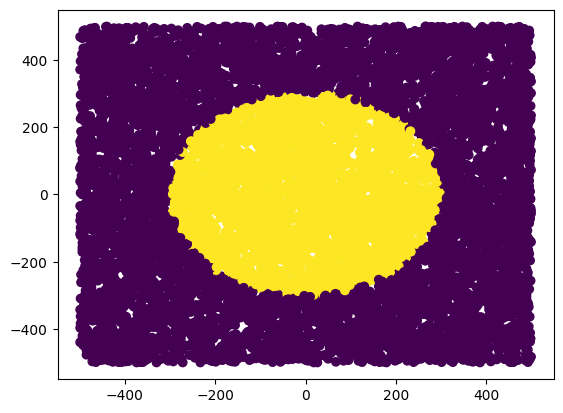

In [24]:


f=open('res_oval.dat')
d=[]
for s in f:
 d.append([float(x) for x in s.split()])
d=np.array(d)
plt.scatter(d[:,0],d[:,1],c=d[:,2])
plt.show()

In [25]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (2, )))
model.add(tf.keras.layers.Dense(5, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Теорема апроксимации
tf.keras.utils.plot_model(model, show_layer_activations = True, show_shapes = True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [27]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(d[:, :2], d[:,2], epochs=25)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - accuracy: 0.7148 - loss: 1.1174
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.7414 - loss: 0.4138
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.7650 - loss: 0.3911
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.7841 - loss: 0.3726
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8052 - loss: 0.3544
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8235 - loss: 0.3372
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8365 - loss: 0.3247
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.8460 - loss: 0.3142
Epoch 9/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8604 - loss: 0.2996
Epoch 10/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8679 - loss: 0.2924
Epoch 11/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8784 - loss: 0.2825
Epoch 12/25
313/313 ━━━━━━━━━━

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 463us/step


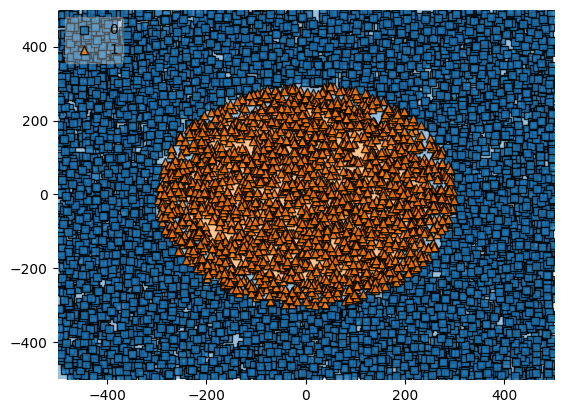

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(d[:, :2], d[:, 2].astype(int), clf = model, legend = 2)
plt.show()

In [29]:
print(d[d[:, 2] > 0.5].shape[0] / d.shape[0])

0.284


In [30]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (2, )))
model.add(tf.keras.layers.Dense(5, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(curve='PR', name = 'aucpr')])

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - accuracy: 0.7127 - aucpr: 0.6806 - loss: 1.0592
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7377 - aucpr: 0.9082 - loss: 0.4143
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.7647 - aucpr: 0.9180 - loss: 0.3915
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.7833 - aucpr: 0.9288 - loss: 0.3726
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.8058 - aucpr: 0.9272 - loss: 0.3562
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8210 - aucpr: 0.9397 - loss: 0.3390
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8354 - aucpr: 0.9411 - loss: 0.3263
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8455 - aucpr: 0.9434 - loss: 0.3139  
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8546 - aucpr: 0.9445 - loss: 0.3039
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0

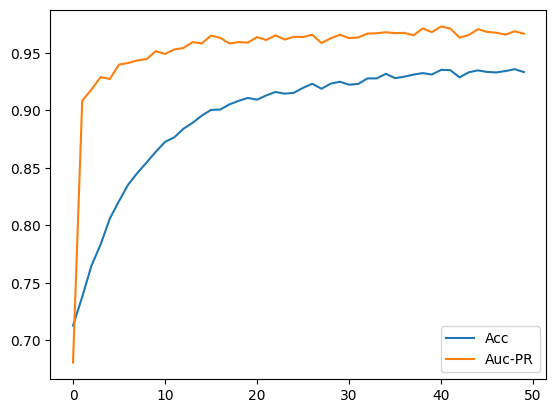

In [32]:
hist = model.fit(d[:, :2], d[:,2], epochs=50)
plt.plot(hist.history['accuracy'], label = 'Acc')
plt.plot(hist.history['aucpr'], label = 'Auc-PR')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(d[:, : 2], d[:, 2])
es = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 5, restore_best_weights = True)
hist = model.fit(x_train, y_train, validation_split = 0.2, shuffle = True,epochs = 100, callbacks=[es])
model.evaluate(x_test, y_test)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9390 - aucpr: 0.9702 - loss: 0.1702 - val_accuracy: 0.6300 - val_aucpr: 0.6747 - val_loss: 1.1053
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9377 - aucpr: 0.9647 - loss: 0.1712 - val_accuracy: 0.8380 - val_aucpr: 0.9199 - val_loss: 0.3432
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9350 - aucpr: 0.9687 - loss: 0.1721 - val_accuracy: 0.9473 - val_aucpr: 0.9761 - val_loss: 0.1716
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9417 - aucpr: 0.9762 - loss: 0.1602 - val_accuracy: 0.8940 - val_aucpr: 0.9451 - val_loss: 0.2364
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9377 - aucpr: 0.9724 - loss: 0.1664 - val_accuracy: 0.9073 - val_aucpr: 0.9856 - val_loss: 0.1829
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9432 - aucpr: 0.9748 - loss: 0.1627 - val_accuracy: 0.9407 - val_aucpr: 0.9732 - val_loss: 0.1707
Epoch 7/10

[0.14198711514472961, 0.9599999785423279, 0.9888918995857239]

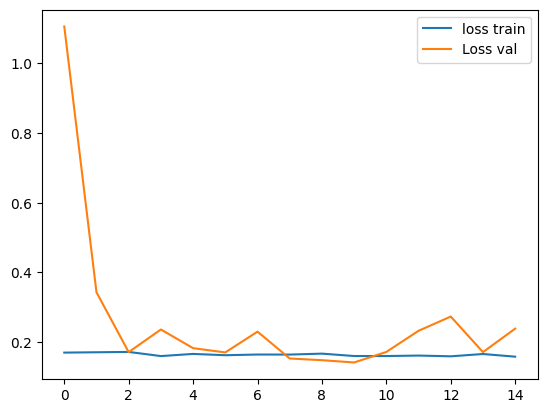

In [34]:
plt.plot(hist.history['loss'], label = 'loss train')
plt.plot(hist.history['val_loss'], label = 'Loss val')
plt.legend()
plt.show()

In [35]:
yprob = model.predict(x_test)
yp = (yprob > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, yp))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1809
         1.0       0.99      0.86      0.92       691

    accuracy                           0.96      2500
   macro avg       0.97      0.93      0.95      2500
weighted avg       0.96      0.96      0.96      2500



In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, yp))

[[1803    6]
 [  94  597]]


In [37]:
f=open('test_add_short.dat/test_add_short.dat')
d=[]
for s in f:
 d.append([float(x) for x in s.split()])
d=np.array(d)

In [38]:
d.shape

(10000, 5)

In [39]:
x = d[:, : -1]
y = d[:, -1]  

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [40]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (4, )))
model.add(tf.keras.layers.Dense(9, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 9)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(curve='PR', name = 'aucpr')])
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True, epochs=1000, callbacks=[es])
model.evaluate(x_test, y_test)

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5767 - aucpr: 0.4166 - loss: 5.9245 - val_accuracy: 0.5633 - val_aucpr: 0.4387 - val_loss: 0.6868
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5802 - aucpr: 0.4206 - loss: 0.6831 - val_accuracy: 0.5633 - val_aucpr: 0.4390 - val_loss: 0.6835
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5802 - aucpr: 0.4242 - loss: 0.6804 - val_accuracy: 0.5633 - val_aucpr: 0.4393 - val_loss: 0.6823
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5802 - aucpr: 0.4208 - loss: 0.6777 - val_accuracy: 0.5633 - val_aucpr: 0.4444 - val_loss: 0.6774
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5802 - aucpr: 0.4308 - loss: 0.6704 - val_accuracy: 0.5633 - val_aucpr: 0.4574 - val_loss: 0.6690
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5802 - aucpr: 0.4398 - loss: 0.6624 - val_accuracy: 0.5633 - val_aucpr: 0.4710 - val_loss: 0.6607
Epoc

[0.45254379510879517, 0.7639999985694885, 0.6440553665161133]

In [42]:
yprob = model.predict(x_test)
yp = (yprob > 0.5).astype(int)
print(classification_report(y_test, yp))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step
              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75      1453
         1.0       0.64      0.99      0.78      1047

    accuracy                           0.76      2500
   macro avg       0.81      0.80      0.76      2500
weighted avg       0.84      0.76      0.76      2500

